In [1]:
import os

os.getcwd()

os.chdir('/hpcnfs/techunits/imaging/work/ATTEND/achiodin/image_registration/current')

import cv2
import numpy as np
import matplotlib.pyplot as plt

from utils.pickle_utils import save_to_pickle
from utils.pickle_utils import load_pickle
from utils.registration import diffeomorphic_registration_dipy
from utils.registration import affine_registration_dipy
from utils.registration import affine_registration_cv2
from utils.load_registration_images import load_registration_images
from utils.image_manipulation import split_image_into_squares
from utils.image_manipulation import stitch_images_variable_size
from utils.image_manipulation import crop_2d_array
from utils.image_manipulation import crop_image_into_strips
from utils.visualization import plot_images_row

In [7]:
from typing import Union, List

def image_grid_split(image, k, m, h_crop_areas: Union[tuple, List[tuple]] = []): 
    v_crops, positions = crop_image_into_strips(image, k=k, m=m)
    crops = []
    for c in h_crop_areas:
        for img in v_crops:
            crops.append(crop_2d_array(img, crop_areas=c))

    return crops

In [3]:
# imgs_dir_test = '/hpcnfs/techunits/imaging/work/ATTEND/crops_Zhan_images_DAPI'
imgs_dir_test = '/hpcnfs/techunits/imaging/work/ATTEND/crops_MaxIP_images_DAPI'

# img_dir_ground_truth = '/hpcnfs/techunits/imaging/work/ATTEND/crop_Zhan_registered'

fixed_image_idx = 0
moving_image_idx = 1
crop_size = 2048
shape = (crop_size, crop_size, 3)

reference_image, moving_image = load_registration_images(imgs_dir_test, fixed_image_idx, moving_image_idx, crop_size)
# reference_image_gt = load_registration_images(img_dir_ground_truth, fixed_image_idx, moving_image_idx, crop_size)

In [4]:
k = crop_size // 2   # Width of each strip
m = k // 4   # Stride for cropping

h_splits = [crop_size // 4 * 3, ]

h_crop_areas = [
    (0, crop_size // 4 * 3, 0, crop_size),
    (crop_size // 4, crop_size, 0, crop_size)
]

In [8]:
ref_crops = image_grid_split(image=reference_image, k=k, m=m, h_crop_areas=h_crop_areas)
mov_crops = image_grid_split(image=moving_image, k=k, m=m, h_crop_areas=h_crop_areas)

In [9]:
# registered_splits = []
# for i in range(len(mov_crops)):
#     affine_reg = affine_registration_cv2(ref_crops[i], mov_crops[i])
#     registered_splits.append(diffeomorphic_registration_dipy(ref_crops[i], affine_reg))

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


In [12]:
# save_to_pickle(registered_splits, '/hpcnfs/techunits/imaging/work/ATTEND/achiodin/image_registration/current/output/NEW_2048_grid_pre_affinde_diffeo_registered_splits.pkl')
registered_splits = load_pickle('/hpcnfs/techunits/imaging/work/ATTEND/achiodin/image_registration/current/output/NEW_2048_grid_pre_affinde_diffeo_registered_splits.pkl')

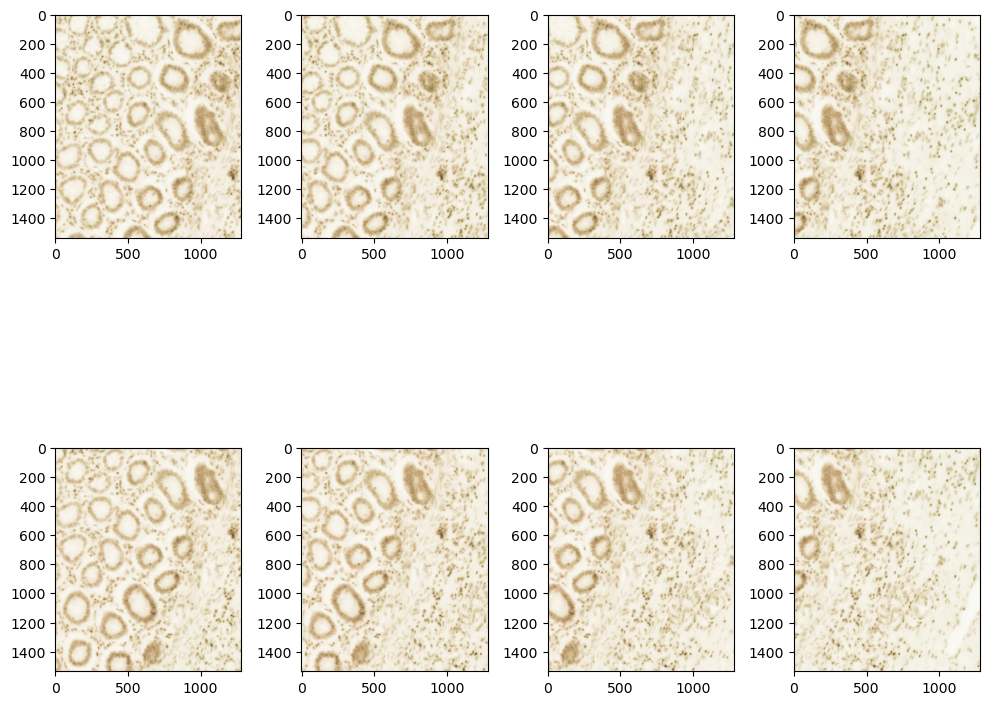

In [11]:
# Display the squares (for visualization)
fig, axes = plt.subplots(2, 4, figsize=(10, 10))
axes = axes.flatten()

for idx, square in enumerate(registered_splits):
    axes[idx].imshow(ref_crops[idx], cmap='Greens', alpha=0.8)
    axes[idx].imshow(registered_splits[idx], cmap='Reds', alpha=0.4)

plt.tight_layout()
plt.show()